In [1]:
import matplotlib.pyplot as plt
import numpy as np
from casino import SimCasino, CasinoAnnealer

Apartado a)
	Proporción días bancarrota:  0.11631333333333625
Apartado b)
	Distribución de fichas al final día:


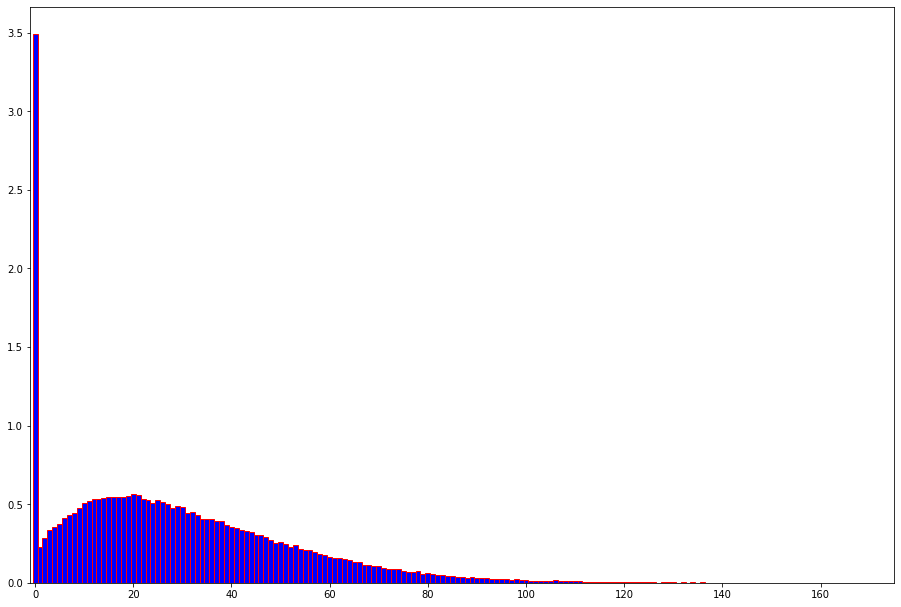

Apartado c)
	Partidas medias antes de bancarrota:  41.43688711256851
Número medio de fichas de cada noche: 28.686626666666672


In [9]:
# Simular para los apartados a, b y c
# a) ¿qué proporción de noches a lo largo de un mes se ha retirado por quedarse sin dinero?
# b) ¿Cuál es el número de fichas con las que ha finalizado las noches de ese mes y cómo se distribuye (representar el histograma)? 
# c) ¿cuál  es  el  número  medio  de  partidas  jugadas  antes  de  retirarse  por quedarse sin dinero?
sim = SimCasino()
a, b, c = sim.simular(n_simulaciones=5000)
print(f'Apartado a)\n\tProporción días bancarrota:  {a}')
print(f'Apartado b)\n\tDistribución de fichas al final día:')
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(list(range(sim.max_fichas + 35)),b, width=1, color = 'b', edgecolor='r')
# ax.set_xticks([0] + list(filter(lambda z: z, [x if y > 0 else 0 for x, y in enumerate(b)])))
plt.xlim([min(np.where(b != 0)[0]) - 1, max(np.where(b != 0)[0]) + 1])
plt.show()
print(f'Apartado c)\n\tPartidas medias antes de bancarrota:  {c}')

print(f'Número medio de fichas de cada noche: {sum([x*y for x, y in enumerate(b/sim.n_dias)])}')

Apartado a)
	Proporción días bancarrota:  0.11686666666666713
Apartado b)
	Distribución de fichas al final día:


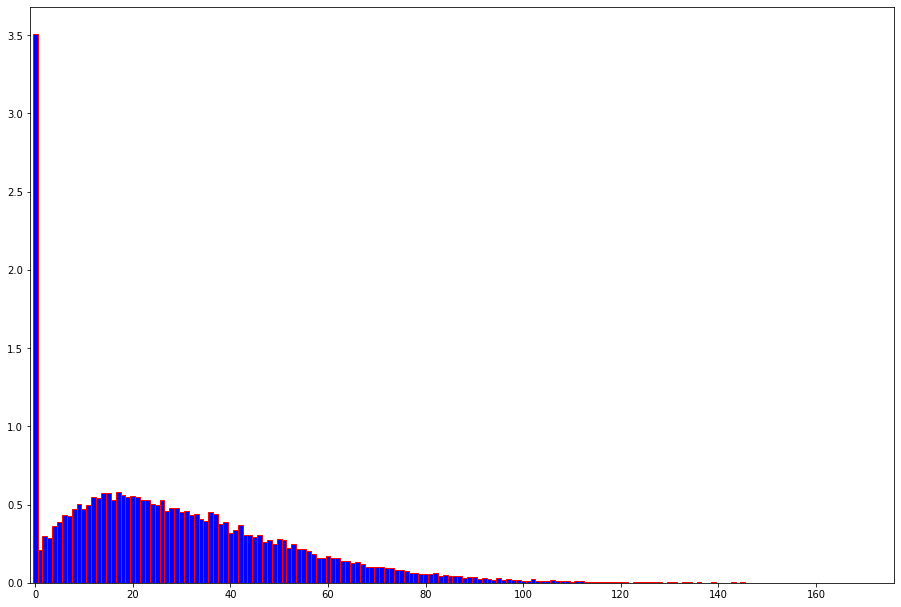

Apartado c)
	Partidas medias antes de bancarrota:  41.53942728482606
Número medio de fichas de cada noche: 28.570100000000007
Desviación estandar de fichas de la simulación: 23.514547646598224


In [10]:
# Simular para los apartados a, b y c
# a) ¿qué proporción de noches a lo largo de un mes se ha retirado por quedarse sin dinero?
# b) ¿Cuál es el número de fichas con las que ha finalizado las noches de ese mes y cómo se distribuye (representar el histograma)? 
# c) ¿cuál  es  el  número  medio  de  partidas  jugadas  antes  de  retirarse  por quedarse sin dinero?
sim = SimCasino()
a, b, c = sim.simular(n_simulaciones=1000)
print(f'Apartado a)\n\tProporción días bancarrota:  {a}')
print(f'Apartado b)\n\tDistribución de fichas al final día:')
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(list(range(sim.max_fichas + 35)),b, width=1, color = 'b', edgecolor='r')
# ax.set_xticks([0] + list(filter(lambda z: z, [x if y > 0 else 0 for x, y in enumerate(b)])))
plt.xlim([min(np.where(b != 0)[0]) - 1, max(np.where(b != 0)[0]) + 1])
plt.show()
print(f'Apartado c)\n\tPartidas medias antes de bancarrota:  {c}')
mean = sum([x*y for x, y in enumerate(b/sim.n_dias)])
print(f'Número medio de fichas de cada noche: {mean}')
std = np.sqrt(sum([((x-mean)**2)*y for x, y in enumerate(b)])/(sim.n_dias - 1))
print(f'Desviación estandar de fichas de la simulación: {std}')

In [3]:
# Simular el apartado d
# Si  analizamos  el  problema  a  largo  plazo,  jugando  partidas
# indefinidamente,  y empezando con 30 fichas ¿cuál es la probabilidad de que
# me quede sin dinero? ¿y la de que termine con 150 fichas?
sim = SimCasino(n_dias=1, max_partidas=np.inf, max_fichas=150)
a, b, c = sim.simular(n_simulaciones=50000)
print(f'Probabilidad bancarrota:  {a}')
print(f'Probabilidad terminar con 150 fichas o más:  {1-a}')

Probabilidad bancarrota:  0.86046
Probabilidad terminar con 150 fichas o más:  0.13954


 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.01629        -29.07     0.00%     0.00%     4:47:38     0:39:13
Se ha cumplido el criterio de parada por convergencia

Mejores probabilidades: [0.         0.20708539 0.23986418 0.12549987 0.12107179 0.1281229
 0.17835587]
Fichas medias: 29.074166666666674
Nº epochs 440


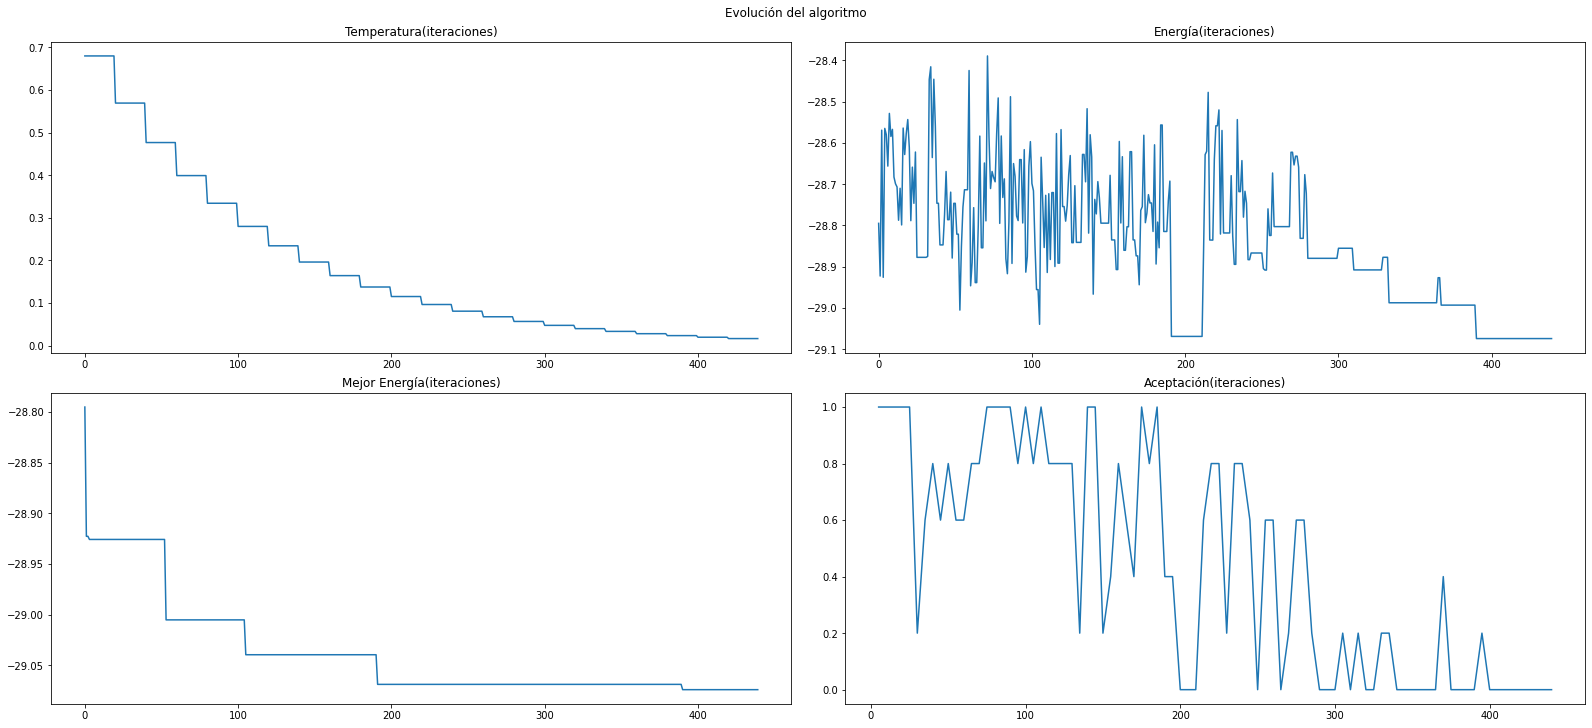

In [5]:
from casino import SimCasino, CasinoAnnealer

ann = CasinoAnnealer(n_simulaciones=1000, T_config={'L': 20}, stop_config={'p_acc': 0.01, 'k': 2})
ann.Tmax = 0.68
ann.Tmin = 0.008
ann.steps = 500
best_sol, best_cost = ann.anneal()
print(f'Mejores probabilidades: {best_sol}')
print(f'Fichas medias: {-best_cost}')
print(f'Nº epochs {ann.epochs}')
ann.plot_evolution()

In [2]:
from casino import SimCasino, CasinoAnnealer

casino = CasinoAnnealer(n_simulaciones=750)
schedule = casino.auto(minutes=10, steps=10)
print(schedule)

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.00800        -28.87     0.00%     0.00%     1:08:10   375:03:37
{'tmax': 0.69, 'tmin': 0.008, 'steps': 22, 'updates': 100}


In [3]:
from casino import SimCasino, CasinoAnnealer

casino = CasinoAnnealer(n_simulaciones=1000)
schedule = casino.auto(minutes=10, steps=10)
print(schedule)

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.02600        -28.92     0.00%     0.00%     1:37:47   474:55:08
{'tmax': 0.68, 'tmin': 0.026, 'steps': 17, 'updates': 100}


# Pruebas Varias

Apartado a)
	Proporción días bancarrota:  0.13042333333333886
Apartado b)
	Distribución de fichas al final día:


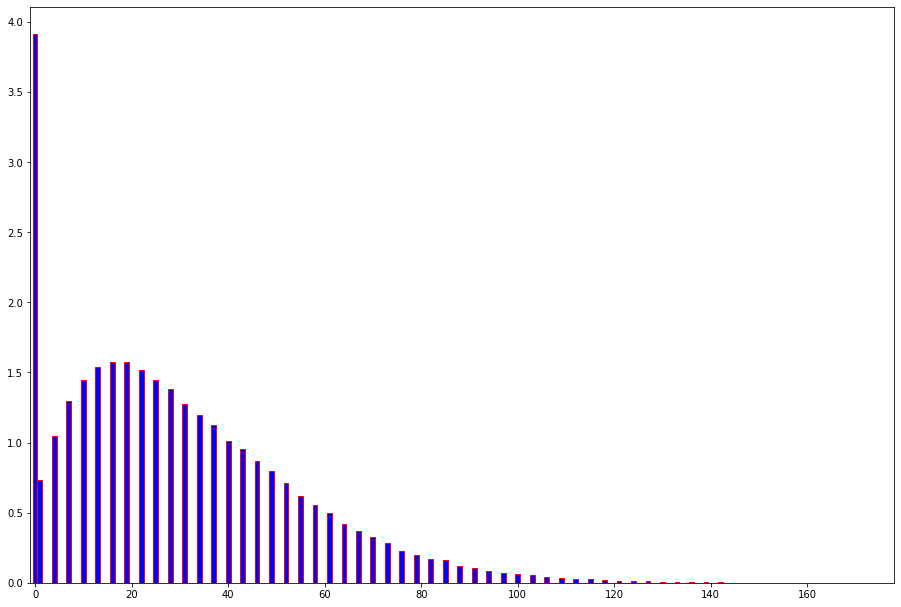

Apartado c)
	Partidas medias antes de bancarrota:  40.1318468885391
Número medio de fichas de cada noche: 28.662243333333322
Desviación estandar de fichas de la simulación: 24.615860259417325


In [2]:
# Comprobar que el resultado del recocido simulado es medianamente cierto
probs = [0.0 ,0.20708539, 0.23986418, 0.12549987, 0.12107179, 0.1281229, 0.17835587]

sim = SimCasino(probs_jugadas=probs)
a, b, c = sim.simular(n_simulaciones=10000)
print(f'Apartado a)\n\tProporción días bancarrota:  {a}')
print(f'Apartado b)\n\tDistribución de fichas al final día:')
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(list(range(sim.max_fichas + 35)),b, width=1, color = 'b', edgecolor='r')
# ax.set_xticks([0] + list(filter(lambda z: z, [x if y > 0 else 0 for x, y in enumerate(b)])))
plt.xlim([min(np.where(b != 0)[0]) - 1, max(np.where(b != 0)[0]) + 1])
plt.show()
print(f'Apartado c)\n\tPartidas medias antes de bancarrota:  {c}')
mean = sum([x*y for x, y in enumerate(b/sim.n_dias)])
print(f'Número medio de fichas de cada noche: {mean}')
std = np.sqrt(sum([((x-mean)**2)*y for x, y in enumerate(b)])/(sim.n_dias - 1))
print(f'Desviación estandar de fichas de la simulación: {std}')

## Prueba de realizar un único tipo de apuesta

Apartado a)
	Proporción días bancarrota:  1.9999999999999998e-05
Apartado b)
	Distribución de fichas al final día:


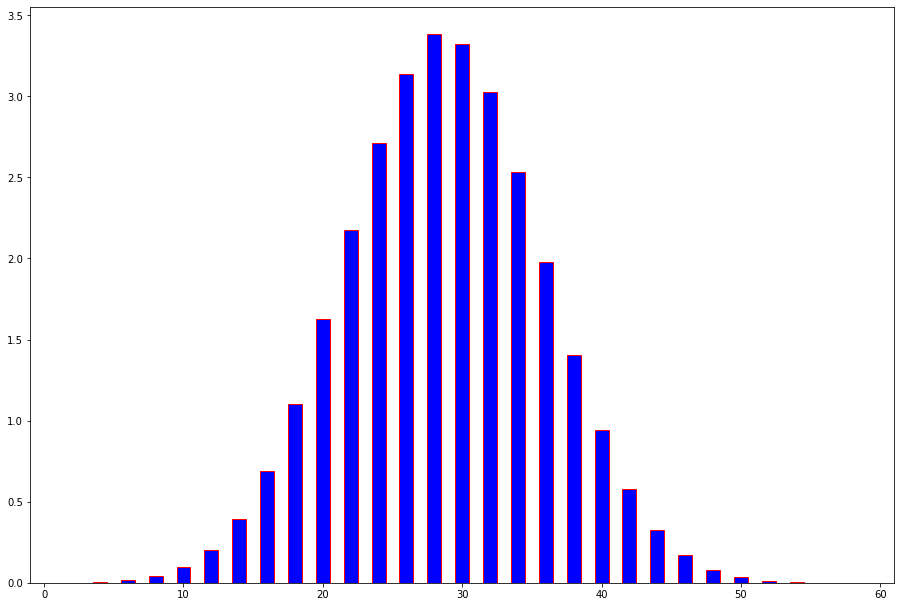

Apartado c)
	Partidas medias antes de bancarrota:  47.0
Número medio de fichas de cada noche: 28.661939999999998
Desviación estandar de fichas de la simulación: 7.18021866704773


In [3]:
probs = [1.0 ,0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

sim = SimCasino(probs_jugadas=probs)
a, b, c = sim.simular(n_simulaciones=10000)
print(f'Apartado a)\n\tProporción días bancarrota:  {a}')
print(f'Apartado b)\n\tDistribución de fichas al final día:')
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(list(range(sim.max_fichas + 35)),b, width=1, color = 'b', edgecolor='r')
# ax.set_xticks([0] + list(filter(lambda z: z, [x if y > 0 else 0 for x, y in enumerate(b)])))
plt.xlim([min(np.where(b != 0)[0]) - 1, max(np.where(b != 0)[0]) + 1])
plt.show()
print(f'Apartado c)\n\tPartidas medias antes de bancarrota:  {c}')
mean = sum([x*y for x, y in enumerate(b/sim.n_dias)])
print(f'Número medio de fichas de cada noche: {mean}')
std = np.sqrt(sum([((x-mean)**2)*y for x, y in enumerate(b)])/(sim.n_dias - 1))
print(f'Desviación estandar de fichas de la simulación: {std}')

Apartado a)
	Proporción días bancarrota:  0.0016333333333333304
Apartado b)
	Distribución de fichas al final día:


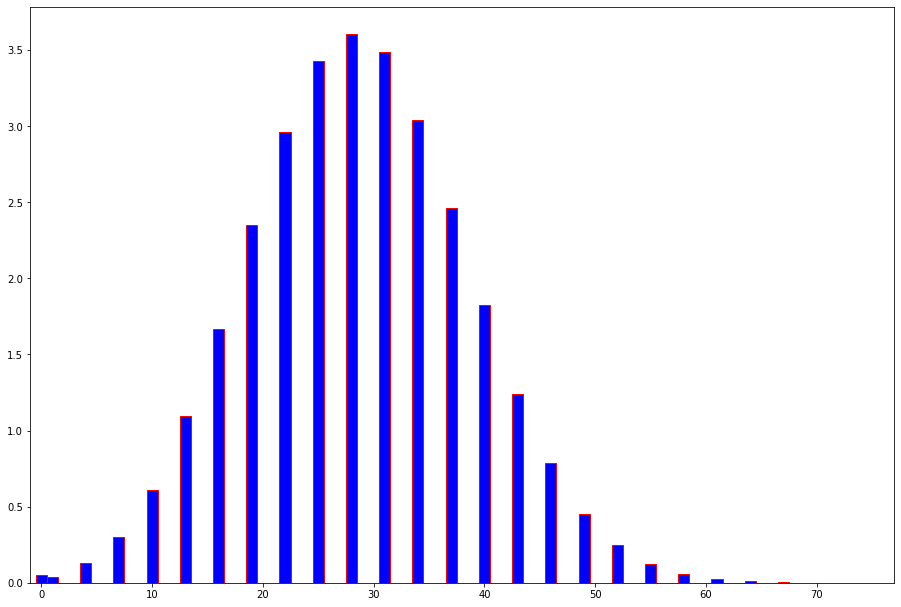

Apartado c)
	Partidas medias antes de bancarrota:  44.1441908713693
Número medio de fichas de cada noche: 28.626396666666665
Desviación estandar de fichas de la simulación: 10.080419251816974


In [4]:
probs = [0.0 ,1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

sim = SimCasino(probs_jugadas=probs)
a, b, c = sim.simular(n_simulaciones=10000)
print(f'Apartado a)\n\tProporción días bancarrota:  {a}')
print(f'Apartado b)\n\tDistribución de fichas al final día:')
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(list(range(sim.max_fichas + 35)),b, width=1, color = 'b', edgecolor='r')
# ax.set_xticks([0] + list(filter(lambda z: z, [x if y > 0 else 0 for x, y in enumerate(b)])))
plt.xlim([min(np.where(b != 0)[0]) - 1, max(np.where(b != 0)[0]) + 1])
plt.show()
print(f'Apartado c)\n\tPartidas medias antes de bancarrota:  {c}')
mean = sum([x*y for x, y in enumerate(b/sim.n_dias)])
print(f'Número medio de fichas de cada noche: {mean}')
std = np.sqrt(sum([((x-mean)**2)*y for x, y in enumerate(b)])/(sim.n_dias - 1))
print(f'Desviación estandar de fichas de la simulación: {std}')

Apartado a)
	Proporción días bancarrota:  0.04383666666667032
Apartado b)
	Distribución de fichas al final día:


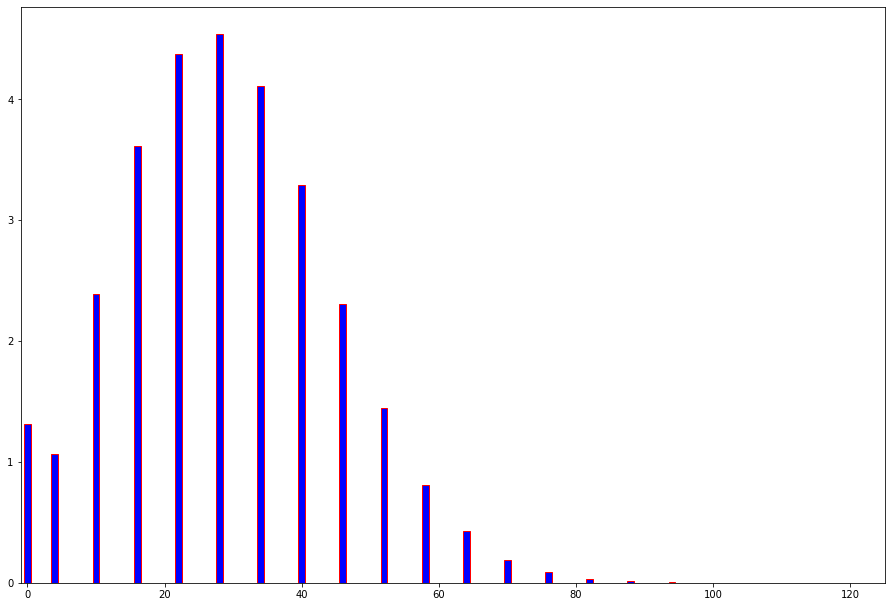

Apartado c)
	Partidas medias antes de bancarrota:  41.485986723456506
Número medio de fichas de cada noche: 28.667113333333333
Desviación estandar de fichas de la simulación: 15.817546339663503


In [5]:
probs = [0.0 ,0.0, 1.0, 0.0, 0.0, 0.0, 0.0]

sim = SimCasino(probs_jugadas=probs)
a, b, c = sim.simular(n_simulaciones=10000)
print(f'Apartado a)\n\tProporción días bancarrota:  {a}')
print(f'Apartado b)\n\tDistribución de fichas al final día:')
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(list(range(sim.max_fichas + 35)),b, width=1, color = 'b', edgecolor='r')
# ax.set_xticks([0] + list(filter(lambda z: z, [x if y > 0 else 0 for x, y in enumerate(b)])))
plt.xlim([min(np.where(b != 0)[0]) - 1, max(np.where(b != 0)[0]) + 1])
plt.show()
print(f'Apartado c)\n\tPartidas medias antes de bancarrota:  {c}')
mean = sum([x*y for x, y in enumerate(b/sim.n_dias)])
print(f'Número medio de fichas de cada noche: {mean}')
std = np.sqrt(sum([((x-mean)**2)*y for x, y in enumerate(b)])/(sim.n_dias - 1))
print(f'Desviación estandar de fichas de la simulación: {std}')

Apartado a)
	Proporción días bancarrota:  0.11582666666667162
Apartado b)
	Distribución de fichas al final día:


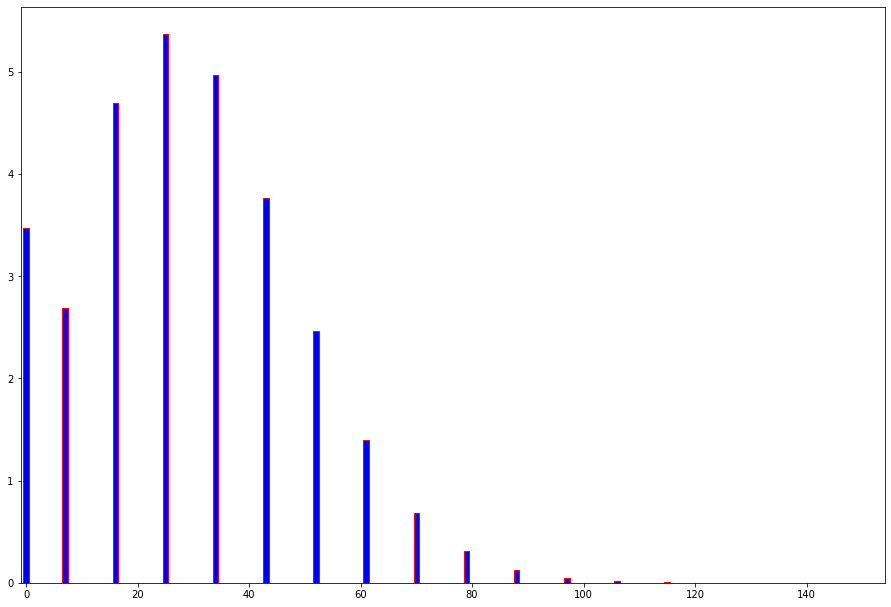

Apartado c)
	Partidas medias antes de bancarrota:  39.796559287465975
Número medio de fichas de cada noche: 28.737133333333333
Desviación estandar de fichas de la simulación: 19.81809851474732


In [6]:
probs = [0.0 ,0.0, 0.0, 1.0, 0.0, 0.0, 0.0]

sim = SimCasino(probs_jugadas=probs)
a, b, c = sim.simular(n_simulaciones=10000)
print(f'Apartado a)\n\tProporción días bancarrota:  {a}')
print(f'Apartado b)\n\tDistribución de fichas al final día:')
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(list(range(sim.max_fichas + 35)),b, width=1, color = 'b', edgecolor='r')
# ax.set_xticks([0] + list(filter(lambda z: z, [x if y > 0 else 0 for x, y in enumerate(b)])))
plt.xlim([min(np.where(b != 0)[0]) - 1, max(np.where(b != 0)[0]) + 1])
plt.show()
print(f'Apartado c)\n\tPartidas medias antes de bancarrota:  {c}')
mean = sum([x*y for x, y in enumerate(b/sim.n_dias)])
print(f'Número medio de fichas de cada noche: {mean}')
std = np.sqrt(sum([((x-mean)**2)*y for x, y in enumerate(b)])/(sim.n_dias - 1))
print(f'Desviación estandar de fichas de la simulación: {std}')

Apartado a)
	Proporción días bancarrota:  0.15566333333334256
Apartado b)
	Distribución de fichas al final día:


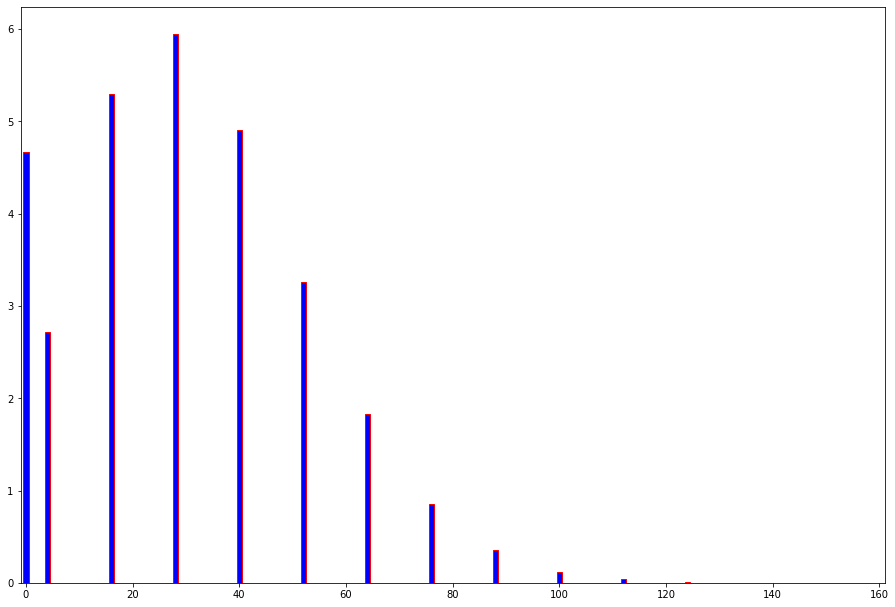

Apartado c)
	Partidas medias antes de bancarrota:  35.874974777167076
Número medio de fichas de cada noche: 28.62266666666667
Desviación estandar de fichas de la simulación: 22.918474092152024


In [7]:
probs = [0.0 ,0.0, 0.0, 0.0, 1.0, 0.0, 0.0]

sim = SimCasino(probs_jugadas=probs)
a, b, c = sim.simular(n_simulaciones=10000)
print(f'Apartado a)\n\tProporción días bancarrota:  {a}')
print(f'Apartado b)\n\tDistribución de fichas al final día:')
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(list(range(sim.max_fichas + 35)),b, width=1, color = 'b', edgecolor='r')
# ax.set_xticks([0] + list(filter(lambda z: z, [x if y > 0 else 0 for x, y in enumerate(b)])))
plt.xlim([min(np.where(b != 0)[0]) - 1, max(np.where(b != 0)[0]) + 1])
plt.show()
print(f'Apartado c)\n\tPartidas medias antes de bancarrota:  {c}')
mean = sum([x*y for x, y in enumerate(b/sim.n_dias)])
print(f'Número medio de fichas de cada noche: {mean}')
std = np.sqrt(sum([((x-mean)**2)*y for x, y in enumerate(b)])/(sim.n_dias - 1))
print(f'Desviación estandar de fichas de la simulación: {std}')

Apartado a)
	Proporción días bancarrota:  0.30791666666668127
Apartado b)
	Distribución de fichas al final día:


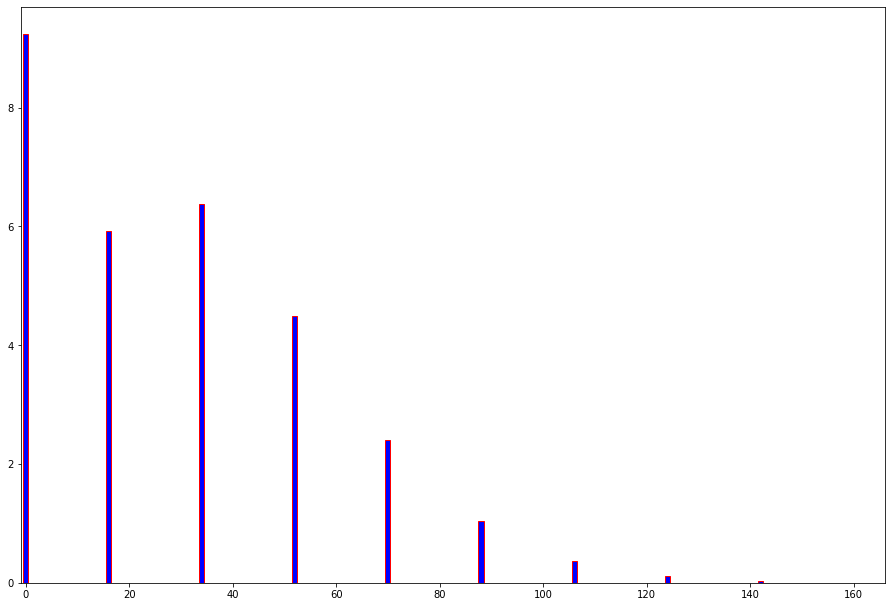

Apartado c)
	Partidas medias antes de bancarrota:  36.996187829074984
Número medio de fichas de cada noche: 28.812333333333328
Desviación estandar de fichas de la simulación: 28.03460179521179


In [8]:
probs = [0.0 ,0.0, 0.0, 0.0, 0.0, 1.0, 0.0]

sim = SimCasino(probs_jugadas=probs)
a, b, c = sim.simular(n_simulaciones=10000)
print(f'Apartado a)\n\tProporción días bancarrota:  {a}')
print(f'Apartado b)\n\tDistribución de fichas al final día:')
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(list(range(sim.max_fichas + 35)),b, width=1, color = 'b', edgecolor='r')
# ax.set_xticks([0] + list(filter(lambda z: z, [x if y > 0 else 0 for x, y in enumerate(b)])))
plt.xlim([min(np.where(b != 0)[0]) - 1, max(np.where(b != 0)[0]) + 1])
plt.show()
print(f'Apartado c)\n\tPartidas medias antes de bancarrota:  {c}')
mean = sum([x*y for x, y in enumerate(b/sim.n_dias)])
print(f'Número medio de fichas de cada noche: {mean}')
std = np.sqrt(sum([((x-mean)**2)*y for x, y in enumerate(b)])/(sim.n_dias - 1))
print(f'Desviación estandar de fichas de la simulación: {std}')

Apartado a)
	Proporción días bancarrota:  0.43766333333335133
Apartado b)
	Distribución de fichas al final día:


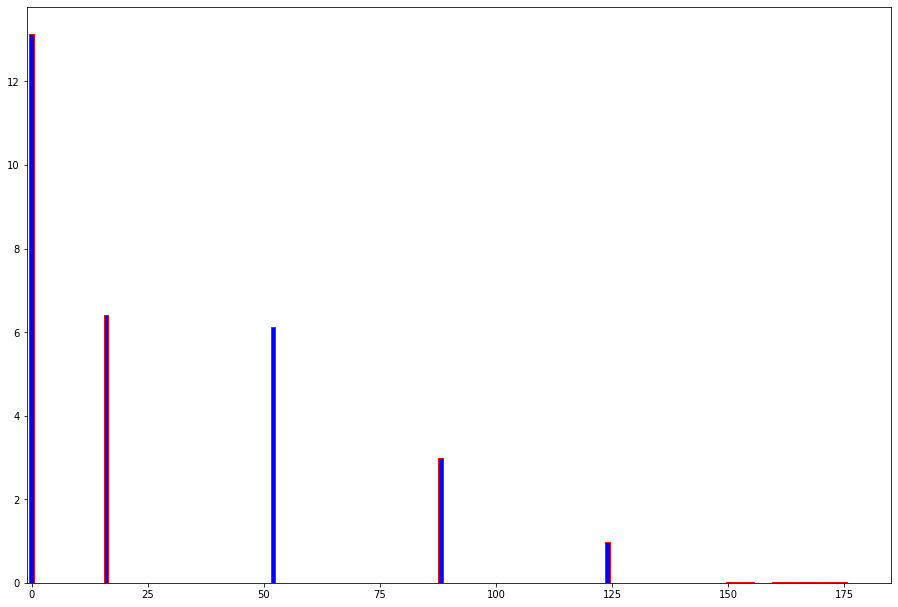

Apartado c)
	Partidas medias antes de bancarrota:  30.0
Número medio de fichas de cada noche: 28.873949999999997
Desviación estandar de fichas de la simulación: 37.7619451034691


In [9]:
probs = [0.0 ,0.0, 0.0, 0.0, 0.0, 0.0, 1.0]

sim = SimCasino(probs_jugadas=probs)
a, b, c = sim.simular(n_simulaciones=10000)
print(f'Apartado a)\n\tProporción días bancarrota:  {a}')
print(f'Apartado b)\n\tDistribución de fichas al final día:')
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(list(range(sim.max_fichas + 35)),b, width=1, color = 'b', edgecolor='r')
# ax.set_xticks([0] + list(filter(lambda z: z, [x if y > 0 else 0 for x, y in enumerate(b)])))
plt.xlim([min(np.where(b != 0)[0]) - 1, max(np.where(b != 0)[0]) + 1])
plt.show()
print(f'Apartado c)\n\tPartidas medias antes de bancarrota:  {c}')
mean = sum([x*y for x, y in enumerate(b/sim.n_dias)])
print(f'Número medio de fichas de cada noche: {mean}')
std = np.sqrt(sum([((x-mean)**2)*y for x, y in enumerate(b)])/(sim.n_dias - 1))
print(f'Desviación estandar de fichas de la simulación: {std}')